# #1

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

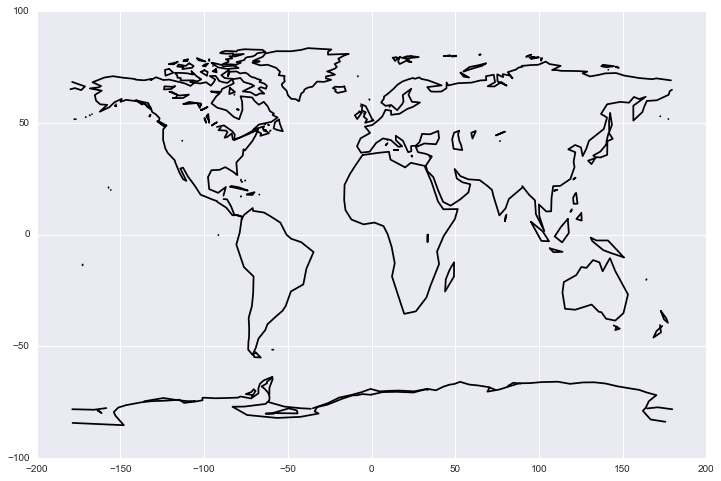

In [27]:
import sqlite3
from numpy import loadtxt, array, log2

f, ax = plt.subplots(figsize=(12, 8))
longitude_list = []
latitude_list = []
world_datafile = open("world.txt", "r")

for line in world_datafile:
    if line.split()[0] != "nan":
        longitude_list.append(float(line.split()[0].rstrip()))
        latitude_list.append(float(line.split()[1].rstrip()))
    else:    
        ax.plot(longitude_list, latitude_list, color="k")
        longitude_list = []
        latitude_list = []
world_datafile.close()

# #2

In [28]:
station_data = loadtxt("stations_list.txt", skiprows=1, delimiter=",", 
    dtype=bytes).astype(str)

connection = sqlite3.connect(":memory:")

cursor = connection.cursor()

sql_cmd = """CREATE TABLE stations (id INTEGER PRIMARY KEY AUTOINCREMENT,
    code TEXT, latitude FLOAT, longitude FLOAT, elevation FLOAT, 
    network TEXT, status TEXT, name TEXT)"""

cursor.execute(sql_cmd)
count = 0
for station in station_data:
    if (station[0] and station[1] and station[2] and
        station[3] and station[4] and station[5] and station[6]):
        station_code = station[0]
        station_latitude = float(station[1])
        station_longitude = float(station[2])
        station_elevation = float(station[3])
        station_network = station[4]
        station_status = station[5]
        station_name = station[6]
        data = (station_code, station_latitude, station_longitude, 
            station_elevation, station_network, station_status, station_name)
        sql_cmd = ("INSERT INTO stations (code, latitude, longitude, " +     
            "elevation, network, status, name) VALUES " + str(data))
        cursor.execute(sql_cmd)

# #3
Closed Stations

2808 Closed stations


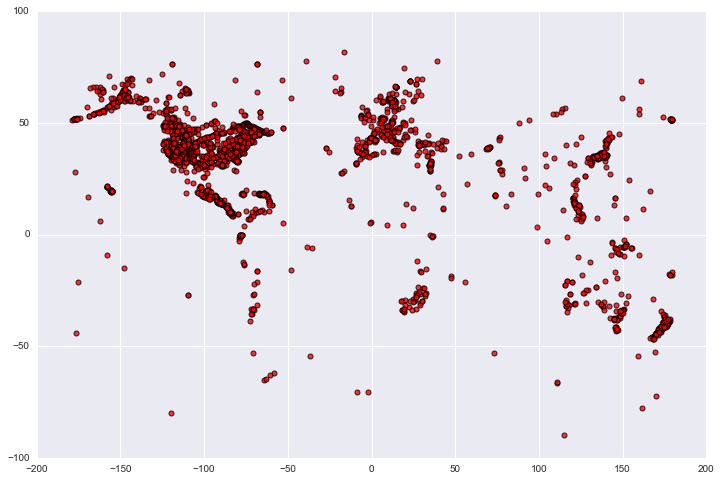

In [29]:
f, ax = plt.subplots(figsize=(12, 8))

sql_cmd = """SELECT longitude, latitude FROM stations 
    WHERE status == 'Closed'"""
cursor.execute(sql_cmd)
db_info = array(cursor.fetchall())
ax.scatter(db_info[:,0], db_info[:,1], c="red", alpha=0.8, s=25, linewidths=1)
print(len(db_info), "Closed stations")

Reserved Stations

502 Reserved stations


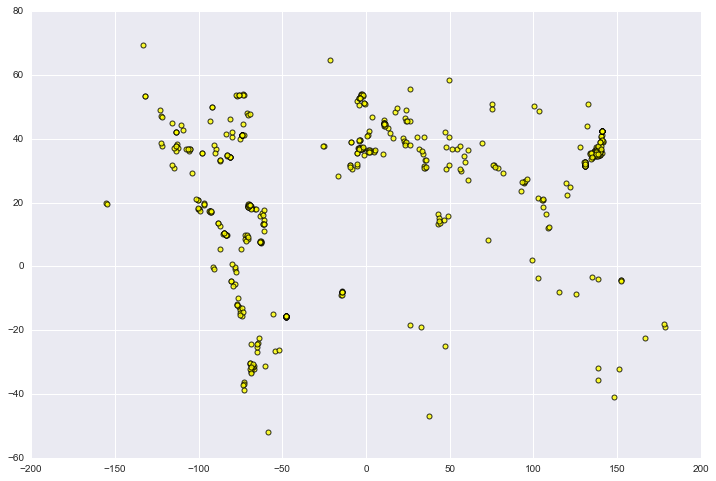

In [30]:
f, ax = plt.subplots(figsize=(12, 8))

sql_cmd = """SELECT longitude, latitude FROM stations 
    WHERE status == 'Reserved'"""
cursor.execute(sql_cmd)
db_info = array(cursor.fetchall())
ax.scatter(db_info[:,0], db_info[:,1], c="yellow", alpha=0.8, s=25, linewidths=1)
print(len(db_info), "Reserved stations")

Open Stations

9055 Open stations


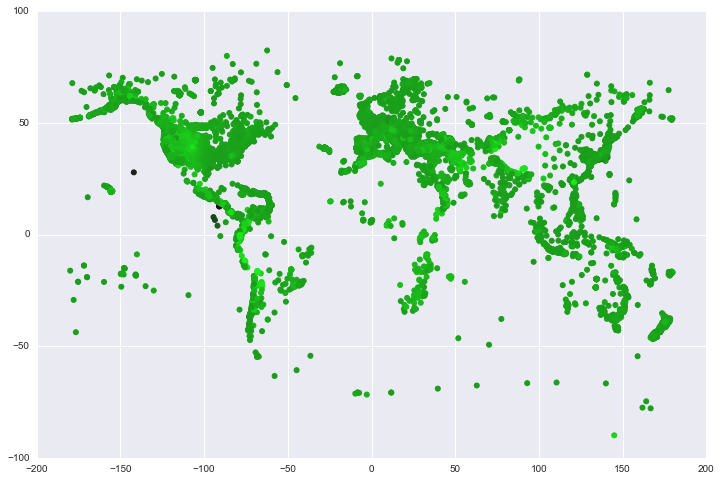

In [31]:
f, ax = plt.subplots(figsize=(12, 8))

sql_cmd = """SELECT longitude, latitude, elevation FROM stations 
    WHERE status == 'Open'"""
cursor.execute(sql_cmd)
db_info = array(cursor.fetchall())
elevation_range = db_info.max() - db_info.min()
elevation_floor = db_info.min()
elevation_ratio = log2(1.0 + (db_info[:,2] - elevation_floor) / elevation_range)
elevation_color_list = []
for num in elevation_ratio:
    elevation_color_list.append((0.1, num, 0.1))
ax.scatter(db_info[:,0], db_info[:,1], color=elevation_color_list, 
        alpha=1.0, s=25, linewidths=1)
print(len(db_info), "Open stations")

Putting it all together.

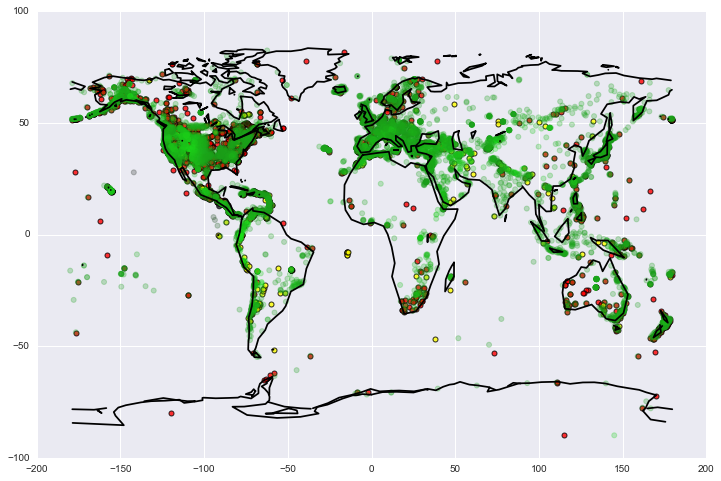

In [32]:
f, ax = plt.subplots(figsize=(12, 8))

longitude_list = []
latitude_list = []
world_datafile = open("world.txt", "r")
for line in world_datafile:
    if line.split()[0] != "nan":
        longitude_list.append(float(line.split()[0].rstrip()))
        latitude_list.append(float(line.split()[1].rstrip()))
    else:    
        ax.plot(longitude_list, latitude_list, color="k")
        longitude_list = []
        latitude_list = []
world_datafile.close()

sql_cmd = """SELECT longitude, latitude FROM stations 
    WHERE status == 'Closed'"""
cursor.execute(sql_cmd)
db_info = array(cursor.fetchall())
ax.scatter(db_info[:,0], db_info[:,1], c="red", alpha=0.8, s=25, linewidths=1)

sql_cmd = """SELECT longitude, latitude FROM stations 
    WHERE status == 'Reserved'"""
cursor.execute(sql_cmd)
db_info = array(cursor.fetchall())
ax.scatter(db_info[:,0], db_info[:,1], c="yellow", alpha=0.8, s=25, linewidths=1)

sql_cmd = """SELECT longitude, latitude, elevation FROM stations 
    WHERE status == 'Open'"""
cursor.execute(sql_cmd)
db_info = array(cursor.fetchall())
elevation_range = db_info.max() - db_info.min()
elevation_floor = db_info.min()
elevation_ratio = log2(1.0 + (db_info[:,2] - elevation_floor) / elevation_range)
elevation_color_list = []
for num in elevation_ratio:
    elevation_color_list.append((0.1, num, 0.1))
ax.scatter(db_info[:,0], db_info[:,1], color=elevation_color_list, 
        alpha=0.25, s=25, linewidths=1)

# connection.commit()
# connection.close()